In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("./basketball_stat.csv")
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [3]:
kNN = KNeighborsClassifier(n_neighbors=2)


##  쓸만한거
- 3P
- BLK
- TRB

# BLK, TRB -> kNN

In [4]:
Shooter_BLK = df[df['Pos']=="SG"]['BLK']
Shooter_TRB = df[df['Pos']=="SG"]['TRB']
Shooter_3P = df[df['Pos']=="SG"]['3P']
Center_BLK = df[df['Pos']=="C"]['BLK']
Center_TRB = df[df['Pos']=="C"]['TRB']
Center_3P = df[df['Pos']=="C"]['3P']

print(list(Center_TRB))

[7.7, 4.5, 2.6, 7.0, 5.1, 8.1, 8.1, 4.5, 11.0, 11.8, 6.5, 13.8, 7.8, 3.9, 6.3, 7.8, 12.8, 10.4, 4.1, 1.6, 3.8, 5.1, 3.2, 4.2, 5.5, 6.8, 12.7, 9.8, 13.8, 4.5, 5.7, 6.6, 5.4, 6.4, 4.8, 3.2, 4.2, 4.9, 3.9, 7.5, 4.7, 3.5, 4.5, 5.5, 9.2, 12.3, 7.3, 9.5, 10.4, 14.1]


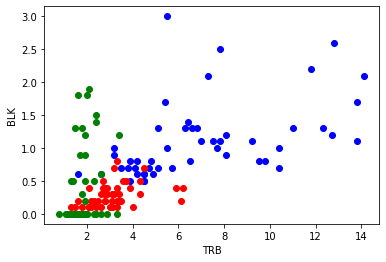

In [5]:
plt.scatter(Center_TRB, Center_BLK, color='blue')
plt.scatter(Shooter_TRB, Shooter_BLK, color='red')
plt.scatter(Shooter_3P, Center_3P, color='green')

plt.xlabel('TRB')
plt.ylabel('BLK')
plt.show()

In [6]:
BLK = list(Shooter_BLK) + list(Center_BLK)
TRB = list(Shooter_TRB) + list(Center_TRB)
P_3 = list(Shooter_3P) + list(Center_3P)

In [7]:
player_data = [[b, t] for b, t in zip(BLK, TRB)]

In [8]:
print(player_data)

[[0.1, 1.3], [0.5, 4.3], [0.4, 6.2], [0.3, 3.1], [0.1, 2.4], [0.4, 5.9], [0.3, 3.2], [0.2, 6.1], [0.2, 3.3], [0.1, 3.0], [0.3, 2.9], [0.2, 1.6], [0.1, 1.8], [0.1, 1.5], [0.1, 2.1], [0.1, 3.1], [0.2, 2.3], [0.5, 2.7], [0.8, 3.3], [0.2, 2.8], [0.1, 3.1], [0.2, 2.8], [0.1, 3.3], [0.4, 2.7], [0.2, 3.4], [0.1, 4.0], [0.3, 2.8], [0.2, 3.4], [0.3, 3.4], [0.2, 3.5], [0.5, 3.6], [0.1, 2.1], [0.1, 2.1], [0.4, 2.1], [0.3, 2.6], [0.3, 4.3], [0.2, 2.2], [0.7, 3.2], [0.1, 2.2], [0.4, 2.9], [0.4, 3.9], [0.3, 2.8], [0.2, 3.1], [0.4, 2.8], [0.4, 2.8], [0.5, 3.7], [0.1, 2.6], [0.7, 4.5], [0.4, 3.3], [0.2, 2.5], [1.0, 7.7], [0.6, 4.5], [0.6, 2.6], [1.1, 7.0], [0.7, 5.1], [0.9, 8.1], [1.2, 8.1], [0.6, 4.5], [1.3, 11.0], [2.2, 11.8], [0.8, 6.5], [1.1, 13.8], [2.5, 7.8], [0.5, 3.9], [1.3, 6.3], [1.1, 7.8], [2.6, 12.8], [0.7, 10.4], [0.7, 4.1], [0.6, 1.6], [0.7, 3.8], [1.3, 5.1], [1.0, 3.2], [0.6, 4.2], [1.0, 5.5], [1.3, 6.8], [1.2, 12.7], [0.8, 9.8], [1.7, 13.8], [0.5, 4.5], [0.7, 5.7], [1.3, 6.6], [1.7, 5.

In [9]:
player_target = [1]*50 + [0]*50
print(player_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
kn = KNeighborsClassifier()

In [11]:
kn.fit(player_data, player_target)

KNeighborsClassifier()

In [12]:
kn.score(player_data, player_target)

0.92

In [13]:
kn.predict([[0.7, 2.8]])

array([1])

In [14]:
df['BLK'].mean()

0.6960000000000001

# 3점 vs 블락?

In [15]:
player_data_ver2 = [[b, t] for b, t in zip(P_3, BLK)]

In [18]:
kn.fit(player_data_ver2, player_target)

kn.predict([[3.2, 0.4]])

array([1])

In [109]:
kn.score(player_data_ver2, player_target)

0.96

# 3점 vs 리바


In [115]:
player_data_ver3 = [[b, t] for b, t in zip(P_3, TRB)]

kn.fit(player_data_ver3, player_target)
kn.score(player_data_ver3, player_target)


0.92